In [2]:
google_drive_path = "data/"
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

**Decision Tree Multi class classification**

In [4]:
X_train_multi, Y_train_multi = joblib.load(google_drive_path+'preprocessed_multi_class_data.joblib')
X_real_multi, Y_real_multi = joblib.load(google_drive_path+'preprocessed_multi_class_test_data.joblib')

In [6]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_train_multi, Y_train_multi, test_size=0.3, random_state=42)

In [47]:
#This cell may take time to execute

dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_multi, y_train_multi)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


KeyboardInterrupt: 

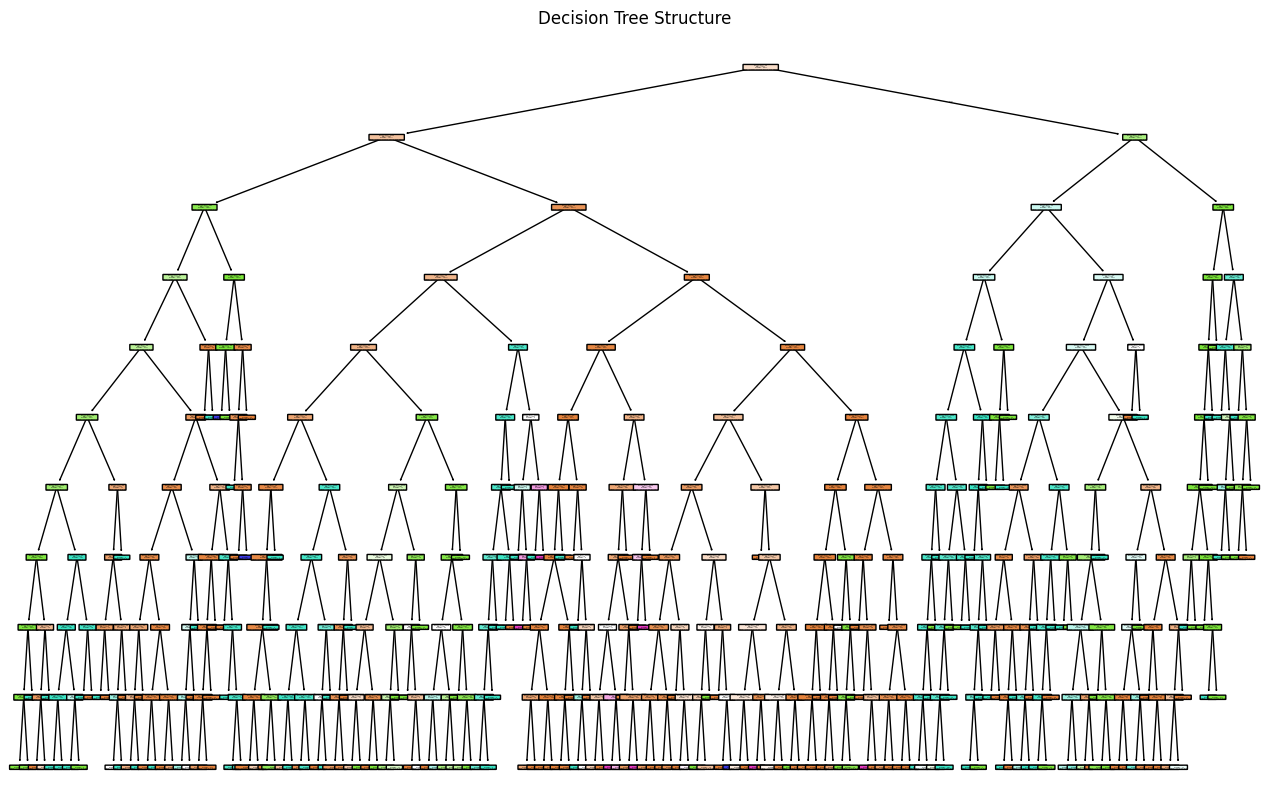

In [4]:
# best_dt = DecisionTreeClassifier(**best_params, random_state=42)
# Directly taking best params computed from above cell, as above cell may take time
d = {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
best_dt = DecisionTreeClassifier(**d, random_state=42)

best_dt.fit(X_train_multi, y_train_multi)

plt.figure(figsize=(16,10))
plot_tree(best_dt, filled=True, feature_names=[f'Feature {i+1}' for i in range(X_train_multi.shape[1])], rounded=True)
plt.title('Decision Tree Structure')
plt.show()

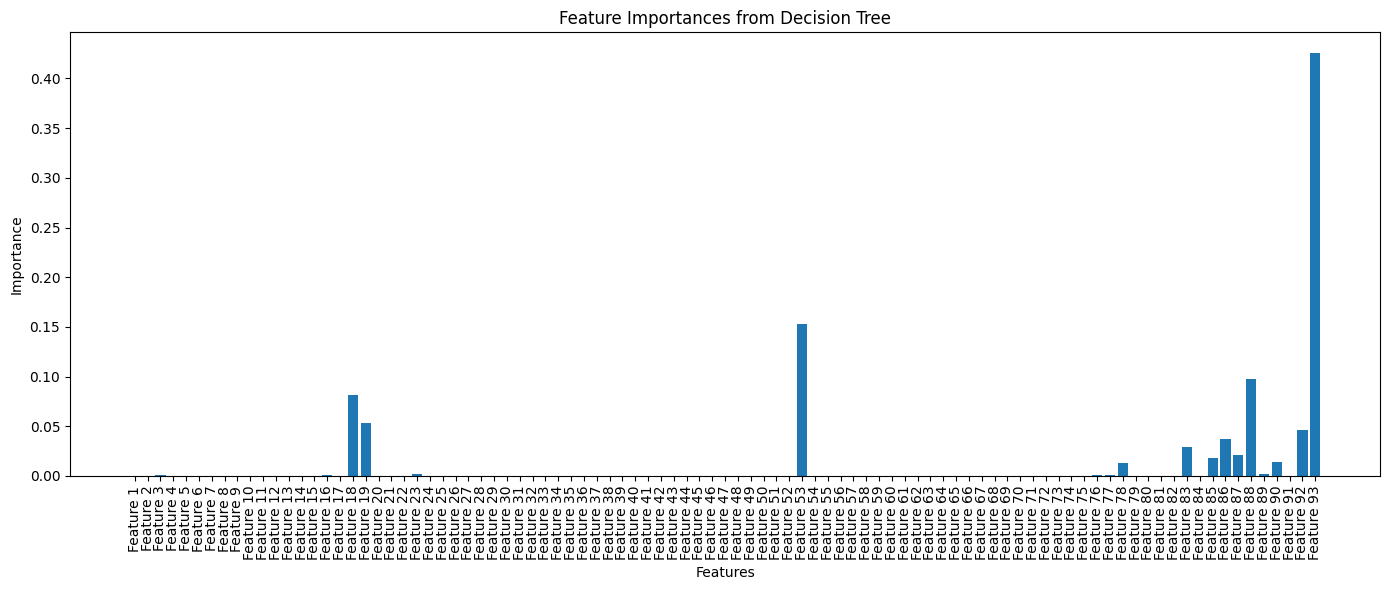

In [6]:
feature_importances = best_dt.feature_importances_

plt.figure(figsize=(14, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(ticks=np.arange(len(feature_importances)), labels=[f'Feature {i+1}' for i in range(len(feature_importances))], rotation=90)
plt.title('Feature Importances from Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [5]:
# Predictions on 30% test data from KDDTrain+.txt
y_pred = best_dt.predict(X_test_multi)

accuracy = accuracy_score(y_test_multi, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_multi, y_pred))

Accuracy: 0.9726

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20084
           1       0.99      0.98      0.98     13825
           2       0.95      0.94      0.94      3540
           3       0.50      0.06      0.11        16
           4       0.86      0.22      0.35       327

    accuracy                           0.97     37792
   macro avg       0.85      0.64      0.67     37792
weighted avg       0.97      0.97      0.97     37792



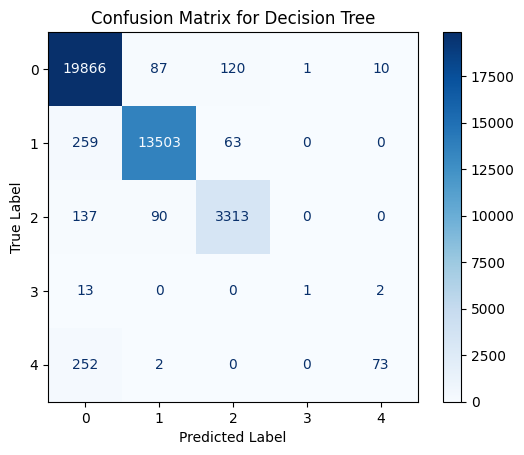

In [7]:
cm = confusion_matrix(y_test_multi, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)

disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [8]:
# Predictions on actual test data KDDTest+.txt
y_pred_real = best_dt.predict(X_real_multi)

accuracy = accuracy_score(Y_real_multi, y_pred_real)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_real_multi, y_pred_real))

Accuracy: 0.7572

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9855
           1       0.95      0.79      0.86      7460
           2       0.78      0.57      0.66      2421
           3       0.00      0.00      0.00        65
           4       0.98      0.08      0.16      2743

    accuracy                           0.76     22544
   macro avg       0.68      0.48      0.49     22544
weighted avg       0.81      0.76      0.72     22544



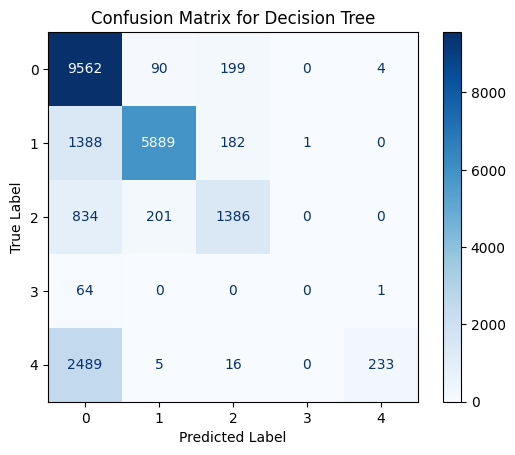

In [9]:
cm = confusion_matrix(Y_real_multi, y_pred_real)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)

disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

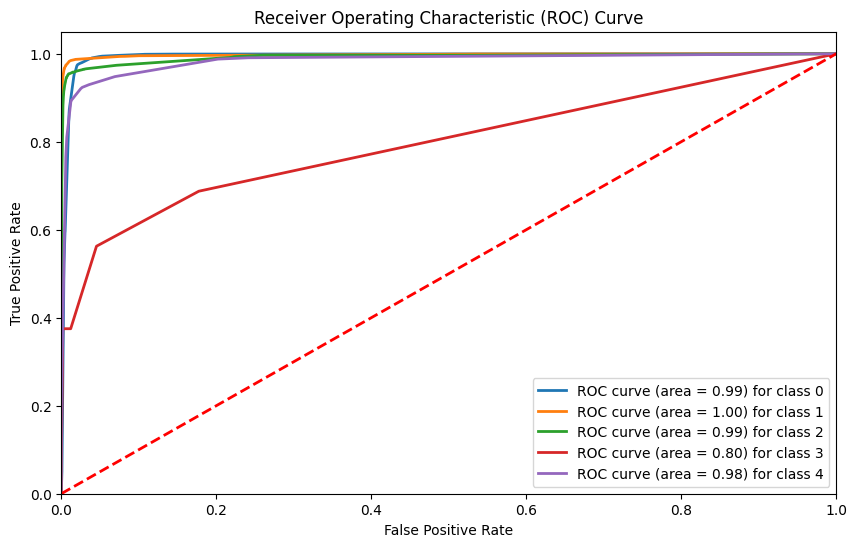

In [10]:
y_test_bin = label_binarize(y_test_multi, classes=best_dt.classes_)

y_scores = best_dt.predict_proba(X_test_multi)

plt.figure(figsize=(10, 6))
for i in range(len(best_dt.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc, best_dt.classes_[i]))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Decision Tree on Binary class classification**

In [11]:
X_train_bin, Y_train_bin = joblib.load(google_drive_path+'preprocessed_binary_class_data.joblib')
X_real_bin, Y_real_bin = joblib.load(google_drive_path+'preprocessed_binary_class_test_data.joblib')
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_train_bin, Y_train_bin, test_size=0.3, random_state=42)

In [12]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bin, y_train_bin)

DecisionTreeClassifier(random_state=42)

In [13]:
# Predict on 30% test data from KDDTrain+.txt
y_pred = dt.predict(X_test_bin)

accuracy = accuracy_score(y_test_bin, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred))

Accuracy: 0.9858

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20083
           1       0.99      0.98      0.98     17709

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



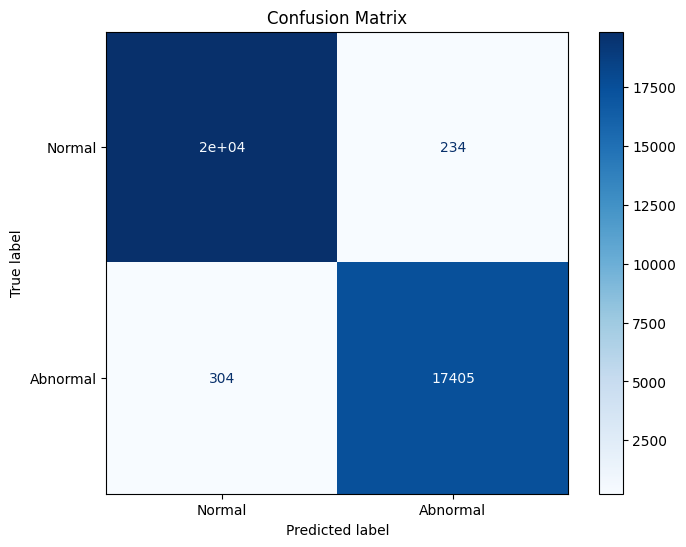

Confusion Matrix:
[[19849   234]
 [  304 17405]]


In [14]:
cm = confusion_matrix(y_test_bin, y_pred)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])

fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)

In [15]:
# Predictions on actual test data KDDTest+.txt
y_pred_real = dt.predict(X_real_bin)

accuracy = accuracy_score(Y_real_bin, y_pred_real)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_real_bin, y_pred_real))

Accuracy: 0.7992

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.96      0.80      9711
           1       0.96      0.68      0.79     12833

    accuracy                           0.80     22544
   macro avg       0.82      0.82      0.80     22544
weighted avg       0.84      0.80      0.80     22544



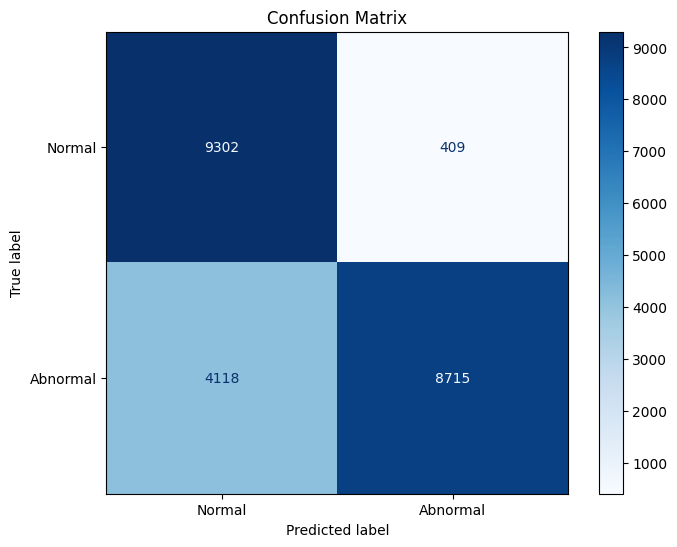

Confusion Matrix:
[[9302  409]
 [4118 8715]]


In [16]:
cm = confusion_matrix(Y_real_bin, y_pred_real)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])

fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)

**RandomForest with mulit class**

In [24]:
X_train_multi, Y_train_multi = joblib.load(google_drive_path+'preprocessed_multi_class_data.joblib')
X_real_multi, Y_real_multi = joblib.load(google_drive_path+'preprocessed_multi_class_test_data.joblib')
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_train_multi, Y_train_multi, test_size=0.3, random_state=42)

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_multi, y_train_multi)

RandomForestClassifier(random_state=42)

In [26]:
# predictions on 30% test data from KDDTrain+.txt
y_pred = rf_model.predict(X_test_multi)
accuracy = accuracy_score(y_test_multi, y_pred)
print("RandomForest Classifier Results")
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_multi, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_multi, y_pred))

RandomForest Classifier Results
Accuracy: 0.9850

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20084
           1       0.99      0.99      0.99     13825
           2       0.97      0.97      0.97      3540
           3       0.50      0.06      0.11        16
           4       0.91      0.84      0.88       327

    accuracy                           0.99     37792
   macro avg       0.87      0.77      0.79     37792
weighted avg       0.98      0.99      0.98     37792


Confusion Matrix:
[[19870   116    70     1    27]
 [  153 13633    39     0     0]
 [   70    23  3447     0     0]
 [   15     0     0     1     0]
 [   51     0     0     0   276]]


In [27]:
# predictions on actual test data from KDDTest+.txt
y_pred = rf_model.predict(X_real_multi)
accuracy = accuracy_score(Y_real_multi, y_pred)
print("RandomForest Classifier Results")
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_real_multi, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_real_multi, y_pred))

RandomForest Classifier Results
Accuracy: 0.7484

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78      9855
           1       0.94      0.75      0.84      7460
           2       0.76      0.58      0.66      2421
           3       0.00      0.00      0.00        65
           4       0.97      0.15      0.26      2743

    accuracy                           0.75     22544
   macro avg       0.67      0.49      0.51     22544
weighted avg       0.80      0.75      0.72     22544


Confusion Matrix:
[[9455  186  205    1    8]
 [1630 5606  224    0    0]
 [ 840  175 1406    0    0]
 [  59    0    0    0    6]
 [2329    0    8    1  405]]


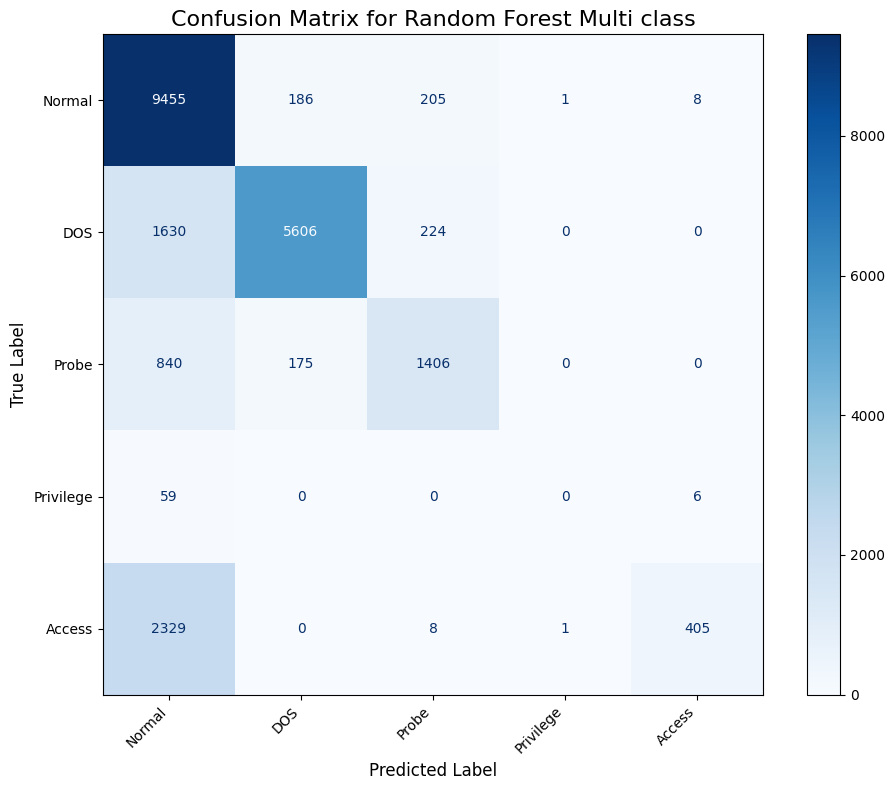

In [28]:
label_map = {0: 'Normal', 1: 'DOS', 2: 'Probe', 3: 'Privilege', 4: 'Access'}

cm = confusion_matrix(Y_real_multi, y_pred)

custom_labels = [label_map[i] for i in range(len(label_map))]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=custom_labels)

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax)

plt.title('Confusion Matrix for Random Forest Multi class', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

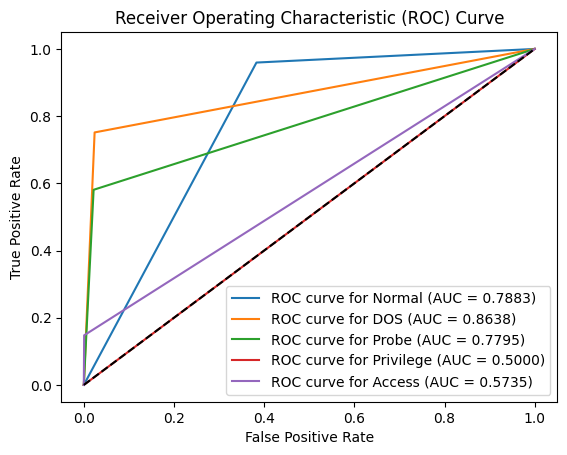

In [29]:

label_map = {0: 'Normal', 1: 'DOS', 2: 'Probe', 3: 'Privilege', 4: 'Access'}
y_test = Y_real_multi
y_pred = y_pred
if len(y_test.shape) == 1:
    encoder = OneHotEncoder()
    y_test_converted = y_test.to_numpy().reshape(-1, 1)
    y_test_encoded = encoder.fit_transform(y_test_converted).toarray()
    y_pred_converted = y_pred.reshape(-1, 1)
    y_pred_encoded = encoder.transform(y_pred_converted).toarray()
else:
    y_test_encoded = y_test
    y_pred_encoded = y_pred

unique_labels = np.unique(y_test)

for label in unique_labels:
    label_index = np.where(unique_labels == label)[0][0]
    fpr_i, tpr_i, _ = roc_curve(y_test_encoded[:, label_index], y_pred_encoded[:, label_index])
    roc_auc = auc(fpr_i, tpr_i)
    plt.plot(fpr_i, tpr_i, label=f'ROC curve for {label_map[label]} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Random Forest With Binary Classification**

In [30]:
X_train_bin, Y_train_bin = joblib.load(google_drive_path+'preprocessed_binary_class_data.joblib')
X_real_bin, Y_real_bin = joblib.load(google_drive_path+'preprocessed_binary_class_test_data.joblib')
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_train_bin, Y_train_bin, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_bin, y_train_bin)

RandomForestClassifier(random_state=42)

In [31]:
# prediction on 30% test data from KDDTrain+.txt
y_pred = rf_model.predict(X_test_bin)
accuracy = accuracy_score(y_test_bin, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred))

Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20083
           1       0.99      0.98      0.99     17709

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792


Confusion Matrix:
[[19869   214]
 [  288 17421]]


In [32]:
# prediction on real test data from KDDTest+.txt
y_pred = rf_model.predict(X_real_bin)
accuracy = accuracy_score(Y_real_bin, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(Y_real_bin, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_real_bin, y_pred))

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78      9711
           1       0.95      0.62      0.75     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.79      0.77     22544
weighted avg       0.83      0.77      0.77     22544


Confusion Matrix:
[[9307  404]
 [4828 8005]]


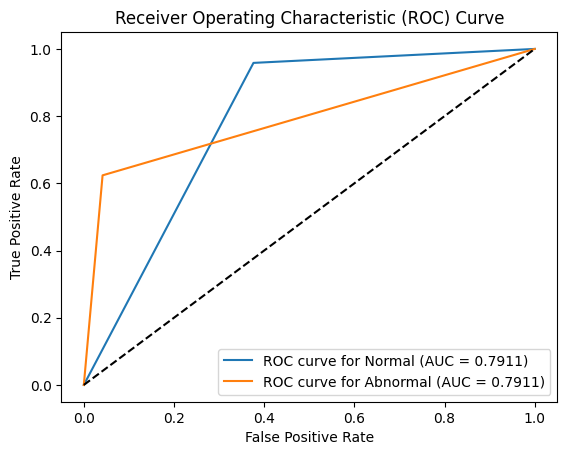

In [33]:
def plot_roc_curve(y_test, y_pred, label_map):
    if isinstance(y_test, pd.Series):
        y_test = y_test.values
    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.values

    if len(y_test.shape) == 1:
        encoder = OneHotEncoder()
        y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()
        y_pred_encoded = encoder.transform(y_pred.reshape(-1, 1)).toarray()
    else:
        y_test_encoded = y_test
        y_pred_encoded = y_pred

    unique_labels = np.unique(y_test)

    for label in unique_labels:
        label_index = np.where(unique_labels == label)[0][0]
        fpr_i, tpr_i, _ = roc_curve(y_test_encoded[:, label_index], y_pred_encoded[:, label_index])
        roc_auc = auc(fpr_i, tpr_i)
        plt.plot(fpr_i, tpr_i, label=f'ROC curve for {label_map[label]} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

label_map = {0: 'Normal', 1: 'Abnormal'}
plot_roc_curve(Y_real_bin, y_pred, label_map)